# Strong and weak forms

The purpose of this python notebppk is to practice the derivation of the weak form of boundary value problems.
There is very little coding that can be done for this module. The ideas are mostly related to the derivation. Nevertheless, some calculations can be done to match the intuition given in class.

Consider some exmaples that actually come from the book:
Zienkiewicz OC, Taylor RL, Zhu JZ. The finite element method: its basis and fundamentals. Elsevier; 2005 May 26.

## Example 1: Weak form of the Helmholtz problem with Dirichlet boundary conditions

Consider the strong form of the following boundary value problem. The PDE to satisfy is:

$$\Delta \phi + c\phi + Q=0$$

which has to be satisfied for every point in a given domain $\mathbf{x}\in\Omega$.
The operator $\Delta \phi$ is called the Laplacian. Another notation for the Laplacian is $\nabla^2 \phi$, which should imply some sort of 'gradient square' operation or $\nabla \cdot \nabla \phi$. In cartesian coordinates this is

$$\Delta \phi = \frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2} $$

but as it has been costumary in this class, I try to avoid cartesian coordinate notation as much as possible and try to do derivations with the tensor notation, no coordinates.

The boundary conditions are simply $\phi=\hat{\phi}$ on the boundary of the domain $\Gamma = \partial \Omega $.

**State the weak form**

1) Multiply by a test function and integrate over the domain

$$\int_\Omega v(\Delta \phi + c\phi + Q) =0$$

2) Do integration by parts for the terms with higher derivatives in order to reduce the continuity and make this a 'weaker' problem. For that let's use the different notation of the Laplacian

$$\int_\Omega v(\nabla\cdot \nabla \phi) +  \int_\Omega v (c\phi + Q) =0$$

$$-\int_\Omega \nabla v\cdot \nabla \phi + \int_\Gamma v \nabla\phi \cdot \mathbf{n} +  \int_\Omega v (c\phi + Q) =0$$

3) Use information about boundary conditions. As described in class, if we know the function $\phi$ at some part of the boundary, then for that part of the boundary we set our weight function to zero. Otherwise, if we know the derivative $\nabla \phi \cdot \mathbf{n}$ then we substitute that value in the integral equation. In this case we know $\phi$ over the entire boundary $\Gamma$ so we can set $v=0$ over all of $\Gamma$ and we are left with

$$-\int_\Omega \nabla v\cdot \nabla \phi +  \int_\Omega v (c\phi + Q) =0$$

4) State the weak form. In the videos and here I'm skipping some important discussions about the function spaces and continuity requirements of $\phi$ and $v$, but trying to keep the bigger picture. The weak form is to find $\phi(\mathbf{x})$ that is a continuous function over $\Omega$ with $\phi=\hat{\phi}$ on the boundary $\Gamma$, and such that   

$$-\int_\Omega \nabla v\cdot \nabla \phi +  \int_\Omega v (c\phi + Q) =0$$

for all $v(\mathbf{x})$ with $v=0$ on $\Gamma$.




## Computations for Example 1

As explained in the video. The integral form should be considered as a way of measuring error on some part of the domain.

For example, consider the domain $[0,1]\subset \mathbb{R}$, just a piece of the real line. And consider $c=1$, $ Q = x(1-x)-3$. For boundary condition let's just do $\phi(0)=\phi(1)=1$ We want to determine a good solution by manually trying a few things.

First of all, let's guess that the solution can be achieved by interpolating a few points. Assume that our tries for $\phi$ are splines defined by the points $(x_i,\phi_i)$ where the points are $x_i=[0.0,0.2,0.4,0.6,0.8,1.0]$, we actually already know the initial and final points  $\phi_i=[1.0,\phi_1,\phi_2,\phi_3,\phi_4,1.0]$. Let's plot what are possible solutions look like

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

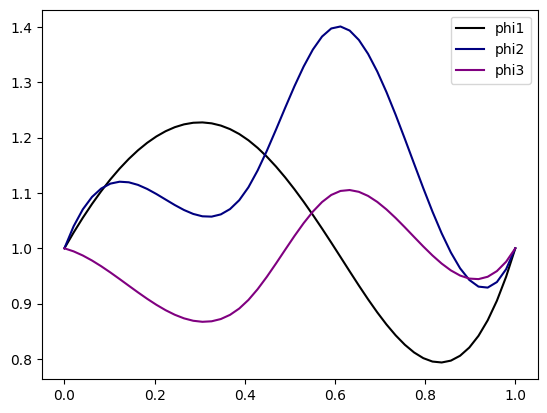

In [ ]:
# x_i are fixed
x_i = [0.,0.2,0.4,0.6,0.8,1.0]

# phi_i we can play with, let's create several
phi_i1 = np.array([1,1.2,1.2,1.0,0.8,1])
phi_i2 = np.array([1,1.1,1.1,1.4,1.1,1])
phi_i3 = np.array([1,0.9,0.9,1.1,1.0,1.0])

# interpolate and plot
phics1 = CubicSpline(x_i, phi_i1)
phics2 = CubicSpline(x_i, phi_i2)
phics3 = CubicSpline(x_i, phi_i3)

# the cubic spline can be evaluated at any points
x_eval = np.linspace(0,1,50)
plt.plot(x_eval,phics1(x_eval),color='black',label='phi1')
plt.plot(x_eval,phics2(x_eval),color='navy',label='phi2')
plt.plot(x_eval,phics3(x_eval),color='purple',label='phi3')
plt.legend(loc=1)

Now let's decide on a few very specific $v(x)$ functions. As mentioned in the video, we want $v(x)$ that are non-zero in part of the domain. Also, remember that we need $v(0)=v(1)=0$. Note how the design of the $v(x)$ functions is very specific

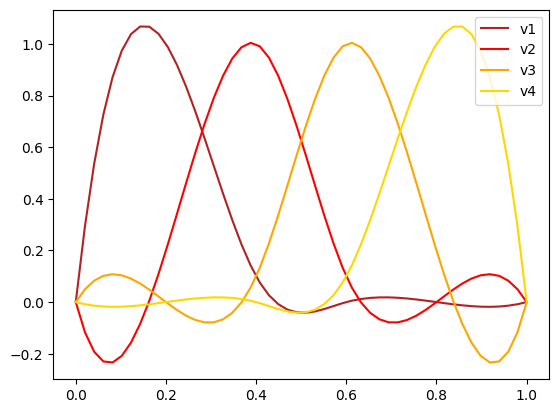

In [ ]:
# x_i are fixed again
x_i = [0.,0.2,0.4,0.6,0.8,1.0]

# v_i we can play with, let's create several, but remember boundary conditions
v_i1 = np.array([0,1.0,0.1,0.0,0.0,0])
v_i2 = np.array([0,0.2,1,0.1,0.,0])
v_i3 = np.array([0,0.0,0.1,1.,0.2,0])
v_i4 = np.array([0,0.0,0.0,0.1,1.0,0])

# interpolate and plot
vcs1 = CubicSpline(x_i, v_i1)
vcs2 = CubicSpline(x_i, v_i2)
vcs3 = CubicSpline(x_i, v_i3)
vcs4 = CubicSpline(x_i, v_i4)

# the cubic spline can be evaluated at any points
x_eval = np.linspace(0,1,50)
plt.plot(x_eval,vcs1(x_eval),color='firebrick',label='v1')
plt.plot(x_eval,vcs2(x_eval),color='red',label='v2')
plt.plot(x_eval,vcs3(x_eval),color='orange',label='v3')
plt.plot(x_eval,vcs4(x_eval),color='gold',label='v4')
plt.legend(loc=1)

So, we have 4 different $v(x)$ functions. We also have ways of generating $\phi(x)$ functions. Let's see if we can find a good solution by manually adjusting the $\phi_i$ points and evaluating the integral equation

$$-\int_\Omega \nabla v\cdot \nabla \phi +  \int_\Omega v (c\phi + Q) =0$$

First, let's evaluate the integral equation for the $\phi$ functions and $v$ functions above. One quick note is that you notice that the integral equation needs the gradients $\nabla \phi, \nabla v$, but we can just get those directly from the spline function, check:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline

For integration, we are going to use a built in python function

https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

In [ ]:
# 4 integrals, the first phi with all four v(x) functions
c = 1
def Q(x):
  return x*(1-x)-3

I_phi1_v1 = - np.trapz(phics1(x_eval,1)*vcs1(x_eval,1),x_eval) + np.trapz(vcs1(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v2 = - np.trapz(phics1(x_eval,1)*vcs2(x_eval,1),x_eval) + np.trapz(vcs2(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v3 = - np.trapz(phics1(x_eval,1)*vcs3(x_eval,1),x_eval) + np.trapz(vcs3(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v4 = - np.trapz(phics1(x_eval,1)*vcs4(x_eval,1),x_eval) + np.trapz(vcs4(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)

print('For the guess phi1, the error considering the four test functions v1, v2, v3, v4 are: ')
print(I_phi1_v1,I_phi1_v2,I_phi1_v3,I_phi1_v4)

For the guess phi1, the error considering the four test functions v1, v2, v3, v4 are: 
0.3352965486181727 -1.0620506248488804 -1.0620506248488797 0.33529654861817226


How do we get better? Manually try to adjust the values $\phi_i$ and see how much you can reduce the four integrals (one integral per weight function v).

**hint**: adjust one $\phi_i$ at a time and reduce one of the integrals to a low value, then proceed to the next $\phi_i$. Repeat that cycle a couple of times.

In [ ]:
# x_i are fixed
x_i = [0.,0.2,0.4,0.6,0.8,1.0]

##---------------------------------------------##
## PLAY HERE
# phi_i we can play with, let's create several
phi_i1 = np.array([1,0.843,0.764,0.764,0.843,1])
##---------------------------------------------##

# interpolate
phics1 = CubicSpline(x_i, phi_i1)

# compute the error with each of the v
I_phi1_v1 = - np.trapz(phics1(x_eval,1)*vcs1(x_eval,1),x_eval) + np.trapz(vcs1(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v2 = - np.trapz(phics1(x_eval,1)*vcs2(x_eval,1),x_eval) + np.trapz(vcs2(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v3 = - np.trapz(phics1(x_eval,1)*vcs3(x_eval,1),x_eval) + np.trapz(vcs3(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)
I_phi1_v4 = - np.trapz(phics1(x_eval,1)*vcs4(x_eval,1),x_eval) + np.trapz(vcs4(x_eval)*(c*phics1(x_eval)+Q(x_eval)),x_eval)

print('For the guess phi1, the error considering the four test functions v1, v2, v3, v4 are: ')
print(I_phi1_v1,I_phi1_v2,I_phi1_v3,I_phi1_v4)

For the guess phi1, the error considering the four test functions v1, v2, v3, v4 are: 
-0.007055578923070849 -0.007799148477859341 -0.007799148477859785 -0.00705557892306985


If you couldnt minimize the function don't you worry, but the idea for the FE method is along those line, we change the values of the $\phi_i$ and we compute the error for multiple $v_i$ and we are happy when those different errors go to zero. The actual solution is given below

In [ ]:
## the actual solution is
def phisol(x,d=0):
  if d==0:
    # return the function
    return x*(x-1)+1
  elif d==1:
    # return the derivative
    return 2*x-1
  elif d==2:
    # return the second derivative
    return 2
  else:
    # return 0
    return 0


# compute the error with each of the v
I_phisol_v1 = - np.trapz(phisol(x_eval,1)*vcs1(x_eval,1),x_eval) + np.trapz(vcs1(x_eval)*(c*phisol(x_eval)+Q(x_eval)),x_eval)
I_phisol_v2 = - np.trapz(phisol(x_eval,1)*vcs2(x_eval,1),x_eval) + np.trapz(vcs2(x_eval)*(c*phisol(x_eval)+Q(x_eval)),x_eval)
I_phisol_v3 = - np.trapz(phisol(x_eval,1)*vcs3(x_eval,1),x_eval) + np.trapz(vcs3(x_eval)*(c*phisol(x_eval)+Q(x_eval)),x_eval)
I_phisol_v4 = - np.trapz(phisol(x_eval,1)*vcs4(x_eval,1),x_eval) + np.trapz(vcs4(x_eval)*(c*phisol(x_eval)+Q(x_eval)),x_eval)

print('For the actual solution, the error considering the four test functions v1, v2, v3, v4 are: ')
print(I_phisol_v1,I_phisol_v2,I_phisol_v3,I_phisol_v4)


For the actual solution, the error considering the four test functions v1, v2, v3, v4 are: 
0.006696584149218587 -0.0028225735805970653 -0.002822573580597121 0.00669658414921892


See how your solution compares to the analytical solution

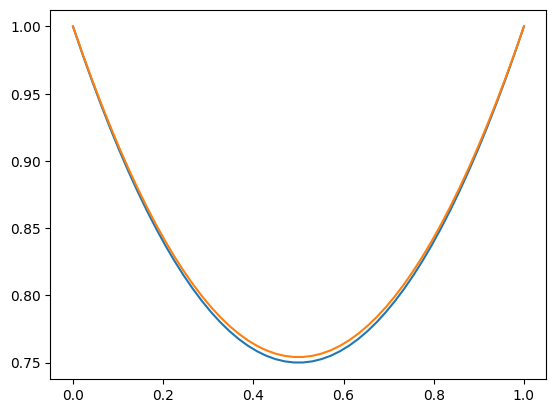

In [ ]:
plt.plot(x_eval,phisol(x_eval))
plt.plot(x_eval,phics1(x_eval))

### Derive the weak form

For the next example, there is no code, just derivation.

Consider the strong form given by

$$\nabla \cdot \nabla \phi + \mathbf{v} \cdot \nabla \phi + \phi^2=0$$

with boundary condition $\phi=1$ on $\Gamma_\phi$ and $q_n=\mathbf{n}\cdot \nabla \phi$ in $\Gamma_q$. The vector $\mathbf{v}$ is a given vector field, you can think of it as a constant for this example.  